In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
#数据处理

In [4]:
data_train=pd.read_csv('C:\\Users\\zhou\\Desktop\\train.csv')

In [5]:
data_train=data_train.dropna(axis=0,subset = ['Age'])#删除掉age缺失的数据

In [6]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
data_labels=data_train.loc[0:,['Survived']]

In [8]:
data_train=data_train.loc[0:,['Pclass','Sex','Age','SibSp','Parch','Fare']]

In [9]:
data_train_array=np.array(data_train)

In [10]:
data_train_array

array([[3, 'male', 22.0, 1, 0, 7.25],
       [1, 'female', 38.0, 1, 0, 71.2833],
       [3, 'female', 26.0, 0, 0, 7.925],
       ...,
       [1, 'female', 19.0, 0, 0, 30.0],
       [1, 'male', 26.0, 0, 0, 30.0],
       [3, 'male', 32.0, 0, 0, 7.75]], dtype=object)

##### data_train_mat

In [11]:
data_label_array=np.array(data_labels)

In [12]:
#将male标记为1，将female标记为0
for i in data_train_array:
    if i[1]=='male':
        i[1]=1
    else: 
        i[1]=0

In [13]:
#归一化 

In [14]:
max_min1=max(data_train_array[:,2])-min(data_train_array[:,2])
max_min2=max(data_train_array[:,5])-min(data_train_array[:,5])
max_min3=max(data_train_array[:,0])-min(data_train_array[:,0])
data_train_array[:,2]=(data_train_array[:,2]-min(data_train_array[:,2]))/max_min1
data_train_array[:,5]=(data_train_array[:,2]-min(data_train_array[:,5]))/max_min2
data_train_array[:,0]=(data_train_array[:,0]-min(data_train_array[:,0]))/max_min3

In [15]:
data_test=pd.read_csv('C:\\Users\\zhou\\Desktop\\test.csv')
data_extend=pd.read_csv('C:\\Users\\zhou\\Desktop\\gender_submission.csv')
data_test=data_test.join(data_extend)
data_test=data_test.dropna(axis=0,subset = ['Age'])
data_test_labels=data_test.loc[0:,['Survived']]
data_test=data_test.loc[0:,['Pclass','Sex','Age','SibSp','Parch','Fare']]
data_test_array=np.array(data_test)
data_test_labels_array=np.array(data_test_labels)
#将male标记为1，将female标记为0
for i in data_test_array:
    if i[1]=='male':
        i[1]=1
    else: 
        i[1]=0

In [16]:
max_min11=max(data_test_array[:,2])-min(data_test_array[:,2])
max_min21=max(data_test_array[:,5])-min(data_test_array[:,5])
max_min31=max(data_test_array[:,0])-min(data_test_array[:,0])
data_test_array[:,2]=(data_test_array[:,2]-min(data_test_array[:,2]))/max_min11
data_test_array[:,5]=(data_test_array[:,2]-min(data_test_array[:,5]))/max_min21
data_test_array[:,0]=(data_test_array[:,0]-min(data_test_array[:,0]))/max_min31

In [17]:
data_test_array

array([[1.0, 1, 0.45272319662402744, 0, 0, 0.0008836568296790959],
       [1.0, 0, 0.6175656072794409, 1, 0, 0.001205407787179495],
       [0.5, 1, 0.815376500065937, 0, 0, 0.0015915089361799738],
       ...,
       [1.0, 0, 0.3670051430832124, 0, 0, 0.0007163463317788883],
       [0.0, 0, 0.5120664644599763, 0, 0, 0.0009994871743792394],
       [1.0, 1, 0.5054727680337597, 0, 0, 0.0009866171360792236]],
      dtype=object)

In [18]:
data_train_array.shape

(714, 6)

In [19]:
data_label_array.shape

(714, 1)

In [20]:
#交叉验证法____划分数据集

In [21]:
#将数据集分均为6组，再将其中的5组重新组合成1组，重新生成6组
list_all=[]
list_final_label=[]
list_final=[]
list_all_label=[]
for i in range(6):
    list_all.append(data_train_array[i*119:(i+1)*119,:])
    list_all_label.append(data_label_array[i*119:(i+1)*119,:]) 
    list_final.append(np.delete(data_train_array,np.s_[i*119:(i+1)*119],0))
    list_final_label.append(np.delete(data_label_array,np.s_[i*119:(i+1)*119],0))

In [22]:
#自助法____划分数据集

In [23]:
import random
train_random=data_train_array[0]
label_random=data_label_array[0]
for i in  range(9999):
    random_nums=random.randint(0,713)
    train_random=np.vstack((train_random,data_train_array[random_nums]))
    label_random=np.vstack((label_random,data_label_array[random_nums]))
    
    

In [24]:
#knn算法

In [80]:
def knn(inx,dataset,labels,k):
    data_size=dataset.shape[0]
    diffmat=np.tile(inx,(data_size,1))-dataset
    diffmat_sqr=diffmat**2
    sqrdiff=diffmat_sqr.sum(axis=1)
    distance_set=sqrdiff**0.5
    distance_sort=np.argsort(distance_set)
    classcount={}
    for i in range(k):
        votelabel=labels[distance_sort[i]]
        classcount[votelabel[0]]=classcount.get(votelabel[0],0)+1
    final=sorted(classcount.items(),key=lambda b:b[1],reverse=True)
    return final[0][0]

In [81]:
#准确率的计算

In [82]:
#直接用测试集和训练集测试
count1=0
count=0
for i in data_test_array:
    count1+=1
    return_label=knn(i,data_train_array,data_label_array,9)
    if return_label==data_test_labels_array[count1-1][0]:
        count+=1
print(count/count1)

{}
{0: 1}
{0: 2}
{0: 3}
{0: 4}
{0: 5}
{0: 6}
{0: 7}
{0: 8}
{}
{0: 1}
{0: 2}
{0: 2, 1: 1}
{0: 3, 1: 1}
{0: 4, 1: 1}
{0: 5, 1: 1}
{0: 5, 1: 2}
{0: 6, 1: 2}
{}
{0: 1}
{0: 1, 1: 1}
{0: 2, 1: 1}
{0: 3, 1: 1}
{0: 4, 1: 1}
{0: 5, 1: 1}
{0: 6, 1: 1}
{0: 7, 1: 1}
{}
{0: 1}
{0: 2}
{0: 2, 1: 1}
{0: 2, 1: 2}
{0: 3, 1: 2}
{0: 4, 1: 2}
{0: 4, 1: 3}
{0: 5, 1: 3}
{}
{0: 1}
{0: 2}
{0: 3}
{0: 3, 1: 1}
{0: 4, 1: 1}
{0: 4, 1: 2}
{0: 5, 1: 2}
{0: 5, 1: 3}
{}
{0: 1}
{0: 2}
{0: 2, 1: 1}
{0: 3, 1: 1}
{0: 4, 1: 1}
{0: 5, 1: 1}
{0: 6, 1: 1}
{0: 7, 1: 1}
{}
{1: 1}
{1: 1, 0: 1}
{1: 1, 0: 2}
{1: 1, 0: 3}
{1: 2, 0: 3}
{1: 2, 0: 4}
{1: 3, 0: 4}
{1: 3, 0: 5}
{}
{0: 1}
{0: 2}
{0: 3}
{0: 4}
{0: 4, 1: 1}
{0: 4, 1: 2}
{0: 4, 1: 3}
{0: 4, 1: 4}
{}
{1: 1}
{1: 1, 0: 1}
{1: 2, 0: 1}
{1: 2, 0: 2}
{1: 3, 0: 2}
{1: 3, 0: 3}
{1: 3, 0: 4}
{1: 4, 0: 4}
{}
{0: 1}
{0: 2}
{0: 3}
{0: 4}
{0: 5}
{0: 6}
{0: 7}
{0: 8}
{}
{1: 1}
{1: 1, 0: 1}
{1: 1, 0: 2}
{1: 1, 0: 3}
{1: 1, 0: 4}
{1: 2, 0: 4}
{1: 2, 0: 5}
{1: 2, 0: 6}
{}
{1: 1}
{1: 2}
{1: 

{1: 1, 0: 3}
{1: 2, 0: 3}
{1: 2, 0: 4}
{1: 2, 0: 5}
{1: 2, 0: 6}
{}
{1: 1}
{1: 2}
{1: 3}
{1: 4}
{1: 5}
{1: 6}
{1: 7}
{1: 8}
{}
{1: 1}
{1: 2}
{1: 3}
{1: 4}
{1: 5}
{1: 6}
{1: 6, 0: 1}
{1: 7, 0: 1}
{}
{0: 1}
{0: 2}
{0: 3}
{0: 4}
{0: 5}
{0: 6}
{0: 7}
{0: 8}
{}
{1: 1}
{1: 2}
{1: 2, 0: 1}
{1: 3, 0: 1}
{1: 4, 0: 1}
{1: 5, 0: 1}
{1: 6, 0: 1}
{1: 7, 0: 1}
{}
{0: 1}
{0: 2}
{0: 3}
{0: 4}
{0: 5}
{0: 6}
{0: 7}
{0: 8}
{}
{1: 1}
{1: 2}
{1: 2, 0: 1}
{1: 3, 0: 1}
{1: 4, 0: 1}
{1: 5, 0: 1}
{1: 6, 0: 1}
{1: 7, 0: 1}
{}
{0: 1}
{0: 2}
{0: 3}
{0: 3, 1: 1}
{0: 4, 1: 1}
{0: 5, 1: 1}
{0: 6, 1: 1}
{0: 7, 1: 1}
{}
{0: 1}
{0: 2}
{0: 3}
{0: 4}
{0: 5}
{0: 6}
{0: 6, 1: 1}
{0: 7, 1: 1}
{}
{0: 1}
{0: 2}
{0: 3}
{0: 4}
{0: 5}
{0: 6}
{0: 7}
{0: 8}
{}
{0: 1}
{0: 2}
{0: 3}
{0: 4}
{0: 5}
{0: 6}
{0: 6, 1: 1}
{0: 7, 1: 1}
{}
{1: 1}
{1: 2}
{1: 3}
{1: 4}
{1: 5}
{1: 6}
{1: 7}
{1: 8}
{}
{0: 1}
{0: 2}
{0: 2, 1: 1}
{0: 2, 1: 2}
{0: 3, 1: 2}
{0: 4, 1: 2}
{0: 5, 1: 2}
{0: 6, 1: 2}
{}
{0: 1}
{0: 1, 1: 1}
{0: 1, 1: 2}
{0: 2, 1: 2}
{0: 

In [28]:
#用交叉验证法测试
import random
list_average=[]
for i in range(6):
    for a in range(random.randint(1,8)):
        count11=0
        count10=0
        for test_sample in list_all[i]:
            count10+=1
            return_label=knn(test_sample,list_final[i],list_final_label[i],9)
            if return_label==list_all_label[i][count10-1][0]:
                count11+=1
        list_average.append(count11/count10)
print(sum(list_average)/len(list_average))

0.7832633053221292


In [29]:
#用自助法测试
count1=0
count=0
for i in data_test_array:
    count1+=1
    return_label=knn(i,train_random,label_random,9)
    if return_label==data_test_labels_array[count1-1][0]:
        count+=1
print(count/count1)

0.7710843373493976


In [30]:
data_train_array.shape

(714, 6)

In [31]:
data_label_array.shape

(714, 1)

In [32]:
#逻辑回归算法

In [33]:
import numpy as np


In [34]:
def sigmoid(z):
    return 1 / (1 + np.exp((-z).astype('float')))

In [35]:
#梯度下降
def grandient_down(dataset,data_labels):
    m,n=dataset.shape
    theta=np.ones((n,1))
    max_iter=100
    learn_rate=0.001
    for i in range(max_iter):
        dataset_out=sigmoid(dataset.dot(theta))
        theta=theta-learn_rate*dataset.T.dot((dataset_out-data_labels))
    return theta
    
    

In [36]:
#准确率的计算

In [37]:
#直接用训练集和测试集
theta=grandient_down(data_train_array,data_label_array)
b=sigmoid(data_test_array.dot(theta))
label_list=[]
for i in b:
    if i[0]>=0.5:
        label_list.append(1)
    else:
        label_list.append(0)
count2=0
count3=0
for i in data_test_labels_array:
    count2+=1
    if i[0]==label_list[count2-1]:
        count3+=1
print(count3/count2)

0.8825301204819277


In [38]:
#用交叉验证法测试
list_out_nums=[]
for i in range(6):
    for random1 in range(random.randint(2,8)):
        label_list=[]
        theta=grandient_down(list_final[i],list_final_label[i])
        b=sigmoid(list_all[i].dot(theta))
        for i1 in b:
            if i1[0]>=0.5:
                label_list.append(1)
            else:
                label_list.append(0)
        count2=0
        count3=0
        for i2 in list_all_label[i]:
            count2+=1
            if i2[0]==label_list[count2-1]:
                count3+=1
        list_out_nums.append(count3/count2)
print(sum(list_out_nums)/len(list_out_nums))

0.7662337662337667


In [39]:
#用自助法测试
theta=grandient_down(train_random,label_random)
b=sigmoid(data_test_array.dot(theta))
label_list=[]
for i in b:
    if i[0]>=0.5:
        label_list.append(1)
    else:
        label_list.append(0)
count2=0
count3=0
for i in data_test_labels_array:
    count2+=1
    if i[0]==label_list[count2-1]:
        count3+=1
print(count3/count2)



0.7710843373493976


In [40]:
data_train_array.shape

(714, 6)

In [41]:
data_label_array.shape

(714, 1)

In [42]:
data_test_array.shape

(332, 6)

In [43]:
data_test_labels_array.shape

(332, 1)

In [44]:
#acc的评估上面已经给出

In [45]:
#knn模型关于recall,precision,F1-score的评估

In [46]:
#knn关于recall的评估
live_nums=0
for i in data_test_labels_array:
    if i[0]==1:
        live_nums+=1
pre_live_nums=0
count=0
for sample in data_test_array:
    count+=1
    return_label=knn(sample,data_train_array,data_label_array,9)
    if return_label==1 and data_test_labels_array[count-1][0]==1:
        pre_live_nums+=1
knn_recall=pre_live_nums/live_nums
print(knn_recall)

0.7401574803149606


In [47]:
#knn关于precision的评估
pre_live_nums=0
count1=0
for sample in data_test_array:
    count1+=1
    return_label=knn(sample,data_train_array,data_label_array,9)
    if return_label==1 and data_test_labels_array[count1-1][0]==1:
        pre_live_nums+=1
pre_live_but_die=0
count=0
for sample in data_test_array:
    count+=1
    return_label=knn(sample,data_train_array,data_label_array,9)
    if return_label==1 and data_test_labels_array[count-1][0]==0:
        pre_live_but_die+=1
knn_precision=pre_live_nums/(pre_live_nums+pre_live_but_die)
print(knn_precision)




0.7899159663865546


In [48]:
#knn关于F1-score的评估
F1_score=(2*knn_precision*knn_recall)/(knn_precision+knn_recall)
F1_score

0.7642276422764228

In [49]:
#逻辑回归关于 recall precision F1-score的评估

In [50]:
#逻辑回归关于recall的评估
live_nums=0
for i in data_test_labels_array:
    if i[0]==1:
        live_nums+=1
pre_live_nums=0
theta=grandient_down(data_train_array,data_label_array)
b=sigmoid(data_test_array.dot(theta))
label_list=[]
for i in b:
    if i[0]>=0.5:
        label_list.append(1)
    else:
        label_list.append(0)
pre_live_nums=0
for i in range(len(label_list)):
    if label_list[i]==1 and label_list[i]==data_test_labels_array[i][0]:
        pre_live_nums+=1
Logistic_recall=pre_live_nums/live_nums
print(Logistic_recall)

0.7086614173228346


In [51]:
#逻辑回归关于precision的评估
theta=grandient_down(data_train_array,data_label_array)
b=sigmoid(data_test_array.dot(theta))
label_list=[]
for i in b:
    if i[0]>=0.5:
        label_list.append(1)
    else:
        label_list.append(0)
pre_live_nums=0
pre_live_but_die=0
for i in range(len(label_list)):
    if label_list[i]==1 and label_list[i]==data_test_labels_array[i][0]:
        pre_live_nums+=1
    if label_list[i]==1 and data_test_labels_array[i][0]==0:
        pre_live_but_die+=1
Logistic_precision=pre_live_nums/(pre_live_nums+pre_live_but_die)
print(Logistic_precision)


0.9782608695652174


In [52]:
#逻辑回归关于F1-score的评估
Logistic_F1_score=(2*Logistic_precision*Logistic_recall)/(Logistic_precision+Logistic_recall)
Logistic_F1_score

0.821917808219178

In [53]:
#关于macro-P macro-R macro-F1, micro-P micro-R micro-F1, ROC&AUC的评估
#因需要训练多个模型，所以用交叉验证法测试

In [54]:
list_all
list_all_label
list_final
list_final_label

[array([[0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],

In [55]:
len(list_final_label)

6

In [56]:
#knn关于macro-P的评估
list_knn_macro_P=[]
index_num=0
for data in list_final:
    index_num+=1
    pre_live_nums=0
    count1=0
    for sample in list_all[index_num-1]:
        count1+=1
        return_label=knn(sample,data,list_final_label[index_num-1],9)
        if return_label==1 and list_all_label[index_num-1][count1-1][0]==1:
            pre_live_nums+=1
    pre_live_but_die=0
    count=0
    for sample in list_all[index_num-1]:
        count+=1
        return_label=knn(sample,data,list_final_label[index_num-1],9)
        if return_label==1 and list_all_label[index_num-1][count-1][0]==0:
            pre_live_but_die+=1
    knn_precision=pre_live_nums/(pre_live_nums+pre_live_but_die)
    list_knn_macro_P.append(knn_precision)
macro_P=sum(list_knn_macro_P)/len(list_knn_macro_P)
print(macro_P)


0.7394669725738566


In [57]:
#knn关于marco-R的评估
list_knn_macro_R=[]
index_num=0
for data in list_final:
    index_num+=1
    pre_live_nums=0
    count1=0
    for sample in list_all[index_num-1]:
        count1+=1
        return_label=knn(sample,data,list_final_label[index_num-1],9)
        if return_label==1 and list_all_label[index_num-1][count1-1][0]==1:
            pre_live_nums+=1
    live_nums=0
    for i in list_all_label[index_num-1]:
        if i[0]==1:
            live_nums+=1
    knn_recall=pre_live_nums/live_nums
    list_knn_macro_R.append(knn_recall)
macro_R=sum(list_knn_macro_R)/len(list_knn_macro_R)
print(macro_R)
        

0.6786531024358254


In [58]:
#marco-F1的评估
marco_F1=(2*macro_P*macro_R)/(macro_P+macro_R)
marco_F1

0.7077560834651451

In [59]:
#knn关于micro-P的评估
from numpy import *
list_pre_live_nums=[]
list_pre_live_but_die=[]
index_num=0
for data in list_final:
    index_num+=1
    pre_live_nums=0
    count1=0
    for sample in list_all[index_num-1]:
        count1+=1
        return_label=knn(sample,data,list_final_label[index_num-1],9)
        if return_label==1 and list_all_label[index_num-1][count1-1][0]==1:
            pre_live_nums+=1
    pre_live_but_die=0
    count=0
    for sample in list_all[index_num-1]:
        count+=1
        return_label=knn(sample,data,list_final_label[index_num-1],9)
        if return_label==1 and list_all_label[index_num-1][count-1][0]==0:
            pre_live_but_die+=1
    list_pre_live_nums.append(pre_live_nums)
    list_pre_live_but_die.append(pre_live_but_die)
knn_micro_P=mean(list_pre_live_nums)/(mean(list_pre_live_but_die)+mean(list_pre_live_nums))
print(knn_micro_P)

0.7388059701492538


In [60]:
#knn关于micro-R的评估
from numpy import *
list_pre_live_nums=[]
list_live_nums=[]
index_num=0
for data in list_final:
    index_num+=1
    pre_live_nums=0
    live_nums=0
    count1=0
    for sample in list_all[index_num-1]:
        count1+=1
        return_label=knn(sample,data,list_final_label[index_num-1],9)
        if return_label==1 and list_all_label[index_num-1][count1-1][0]==1:
            pre_live_nums+=1
        if list_all_label[index_num-1][count1-1][0]==1:
            live_nums+=1
    list_pre_live_nums.append(pre_live_nums)
    list_live_nums.append(live_nums)
knn_micro_R=mean(list_pre_live_nums)/(mean(list_live_nums))
print(knn_micro_R)

0.6827586206896551


In [61]:
#knn关于micro-F1的评估
micro_F1=(2*knn_micro_P*knn_micro_R)/(knn_micro_P+knn_micro_R)
micro_F1

0.7096774193548385

In [62]:
#逻辑回归的ROC和AUC的计算

In [63]:
theta=grandient_down(data_train_array,data_label_array)
b=sigmoid(data_test_array.dot(theta)) 
ROC_nums=0
list_100_ROC=[]
for i in range(30):
    list_ROC=[]
    for pre_out in b:
        if pre_out[0]>=i/30:
            list_ROC.append(1)
        else:
            list_ROC.append(0)
    list_100_ROC.append(list_ROC)
list_Logistic_recall=[]
list_Logistic_FPR=[]
for ROC_label in list_100_ROC:
    live_nums=0
    die_nums=0
    for i in data_test_labels_array:
        if i[0]==1:
            live_nums+=1
        else:
            die_nums+=1        
    pre_live_nums=0
    pre_live_but_die=0
    for i in range(len(ROC_label)):
        if ROC_label[i]==1 and ROC_label[i]==data_test_labels_array[i][0]:
            pre_live_nums+=1
        if ROC_label[i]==1 and data_test_labels_array[i][0]==0:
            pre_live_but_die+=1
    Logistic_recall=pre_live_nums/live_nums
    Logistic_FPR=pre_live_but_die/die_nums
    list_Logistic_recall.append(Logistic_recall)
    list_Logistic_FPR.append(Logistic_FPR)
            

In [64]:
list_Logistic_recall.sort()
list_Logistic_FPR.sort()

In [68]:
list_Logistic_

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.004878048780487805,
 0.00975609756097561,
 0.00975609756097561,
 0.014634146341463415,
 0.02926829268292683,
 0.05853658536585366,
 0.08292682926829269,
 0.16097560975609757,
 0.24390243902439024,
 0.36097560975609755,
 0.47317073170731705,
 0.6926829268292682,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [69]:
list_Logistic_recall

[0.0,
 0.0,
 0.0,
 0.007874015748031496,
 0.007874015748031496,
 0.023622047244094488,
 0.03937007874015748,
 0.11023622047244094,
 0.18110236220472442,
 0.25196850393700787,
 0.3464566929133858,
 0.4409448818897638,
 0.5275590551181102,
 0.6299212598425197,
 0.7086614173228346,
 0.8110236220472441,
 0.9448818897637795,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [65]:
from matplotlib import pyplot as plt

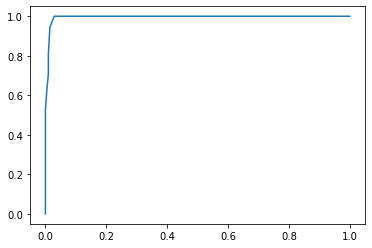

In [66]:
plt.plot(list_Logistic_FPR,list_Logistic_recall)

In [67]:
square=0
for i in range(len(list_Logistic_recall)-1):
    square_min=(list_Logistic_FPR[i+1]-list_Logistic_FPR[i])*(list_Logistic_recall[i]+list_Logistic_recall[i+1])/2
    square+=square_min
Logistic_AUC=square
Logistic_AUC

0.9953332053005569

In [ ]:
#knn的AUC和ROC的计算

In [ ]:
 votelabel=labels[distance_sort[i]]
        classcount[votelabel[0]]=classcount.get(votelabel[0],0)+1
    final=sorted(classcount.items(),key=lambda b:b[1],reverse=True)

In [106]:
#重新定义knn，便于引入阀值
def R_A_knn(inx,dataset,labels,k,possibly_nums):
    list_R_A_label=[]
    data_size=dataset.shape[0]
    diffmat=np.tile(inx,(data_size,1))-dataset
    diffmat_sqr=diffmat**2
    sqrdiff=diffmat_sqr.sum(axis=1)
    distance_set=sqrdiff**0.5
    distance_sort=np.argsort(distance_set)
    for i in range(k):
        list_R_A_label.append(labels[distance_sort[i]])
    possibly0=list_R_A_label.count(0)/len(list_R_A_label)
    possibly1=1-possibly0
    if possibly1>=possibly_nums:
        return 1
    else:
        return 0
 

In [107]:
R_A_knn(data_test_array[1],data_train_array,data_label_array,19,1)

0

In [111]:
knn_ROC_list_x=[]
knn_ROC_list_y=[]
for possibly_nums in range(100):
    count=0
    pre_live_nums=0
    live_nums=0
    pre_live_but_die=0
    die_nums=0
    for sample in data_test_array:
        count+=1
        pre_out=R_A_knn(sample,data_train_array,data_label_array,99,possibly_nums/100)
        if pre_out==1 and data_test_labels_array[count-1][0]==1:
            pre_live_nums+=1
        if data_test_labels_array[count-1][0]==1:
            live_nums+=1
        else:
            die_nums+=1
        if pre_out==1 and data_test_labels_array[count-1][0]==0:
            pre_live_but_die+=1
    if live_nums==0:
        TPR=0
    else:
        TPR=pre_live_nums/live_nums
    if die_nums==0:
        FPR==0
    else:
        FPR=pre_live_but_die/die_nums
    knn_ROC_list_x.append(FPR)
    knn_ROC_list_y.append(TPR)

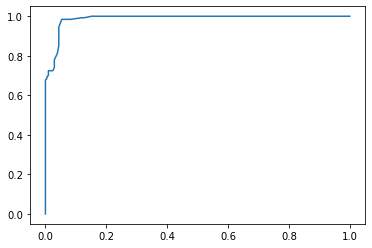

In [112]:
#ROC的图像
knn_ROC_list_x.sort()
knn_ROC_list_y.sort()
plt.plot(knn_ROC_list_x,knn_ROC_list_y)

In [114]:
square=0
for i in range(len(knn_ROC_list_x)-1):
    square_min=(knn_ROC_list_x[i+1]-knn_ROC_list_x[i])*(knn_ROC_list_y[i]+knn_ROC_list_y[i+1])/2
    square+=square_min
R_A_knn_AUC=square
R_A_knn_AUC

0.9874207797196082

In [ ]:
#sklearn的相关任务

In [ ]:
#sklearn_knn

In [67]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
np.random.seed(0)
knn1=KNeighborsClassifier()
knn1.fit(data_train_array,data_label_array.reshape(714,))
data_y_predict=knn1.predict(data_test_array)
score=knn1.score(data_test_array,data_test_labels_array,sample_weight=None)
print(score)

0.8132530120481928


In [68]:
sk_data_train=pd.read_csv('C:\\Users\\zhou\\Desktop\\train.csv')
sk_data_train=sk_data_train.dropna(axis=0,subset=['Age'])
sk_data_label=sk_data_train.loc[0:,['Survived']]
sk_data_train=sk_data_train.loc[0:,['Pclass','Sex','Age','SibSp','Parch','Fare']]
sk_data_label=np.array(sk_data_label)
sk_data_train=np.array(sk_data_train)
for i in sk_data_train:
    if i[1]=='male':
        i[1]=1
    else:
        i[1]=0

In [ ]:
from sklearn import preprocessing
sk_data_train=preprocessing.scale(sk_data_train)#标准化训练集

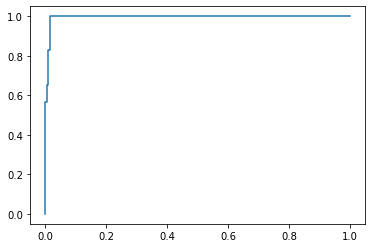

In [71]:
#逻辑回归关于sklearn.metrics的评估
from sklearn import metrics
theta=grandient_down(data_train_array,data_label_array)
b=sigmoid(data_test_array.dot(theta))
fpr,tpr,threholds=metrics.roc_curve(data_test_labels_array.reshape(332,),b.reshape(332,))
plt.plot(fpr,tpr)